In [2]:
import graphlab
import numpy
import pandas
import math
import random
from matplotlib import pyplot as plt
%matplotlib inline
random.seed(2325)
n=30
x=graphlab.SArray([random.random() for i in range(n)]).sort()

In [3]:
print x

[0.023707298742060123, 0.029510783668111218, 0.04655265334484804, 0.13633536334907537, 0.156635992743118, 0.2603399654780134, 0.2742394242786187, 0.2845125607827851, 0.2935168342587585, 0.33743863449676936, 0.398941098242795, 0.4268165909786086, 0.4274207607870947, 0.46818661070942436, 0.4842613879891925, 0.5193037798128904, 0.5480981510261957, 0.5578429481599714, 0.5680709197750493, 0.708137951313787, 0.7112398888790689, 0.7411190730802183, 0.7474320686471526, 0.8729990097539195, 0.8735337464618819, 0.9249014617831766, 0.9252279731415857, 0.9635948033061964, 0.9803768298661434, 0.9841505973121237]


In [8]:
y=x.apply(lambda x: math.sin(4*x))
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

In [9]:
print y


[0.5240820501166198, 0.6009177227574901, 0.20724829053163307, 0.2638621627380481, 0.22229094020034135, 0.8735366582326448, 0.5491222044015301, 0.42887441340363197, 0.9887671811660302, 1.0201277721633635, 1.1818444141411555, 0.6860454266043726, 0.9920391614865626, 0.9331777874548932, 0.43173412194060024, 1.0538195643459702, 0.9198536272242263, 1.5860099539824888, 0.8315395554139552, 0.255910961209651, 0.7032210718045644, 0.2424555326293678, 0.4542916577748052, -0.46512479755305236, -0.2725609564944441, -0.18807225920548631, -0.2985269558059976, -0.6111203752862966, -1.0639880929870158, -0.5654631651809989]


In [12]:
data=graphlab.SFrame({"X1":x,"Y":y})

In [13]:
data.show()


Canvas is updated and available in a tab in the default browser.


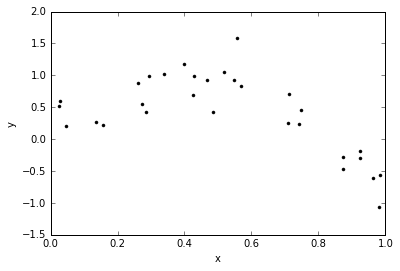

In [14]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

In [ ]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [15]:
def polynomial_regression(data, deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=0.,l1_penalty=0.,
                                              validation_set=None,verbose=False)
    return model